In [4]:
import pandas as pd
import os
import numpy as np
import random
import requests
import seaborn as sns
import matplotlib.pyplot as plt
import urllib.request
import geopandas
import pygeos
import haversine as hs

In [53]:
crime = pd.read_csv(os.getcwd()+'/SPD_Crime_Data__2008-Present-2.csv')
#edu = pd.read_csv(os.getcwd()+'/SPD_Crime_Data__2008-Present-2.csv')
crime=crime[crime['Longitude']!=0]
crime

,100 Block Address,Offense ID,Longitude,Latitude
0,13XX BLOCK OF E BOSTON ST,13,-122.315305,47.638264
2,SW ROXBURY ST / 25TH AVE SW,3,-122.364567,47.517364
3,E HARRISON ST / 16TH AVE E,3,-122.311357,47.622081
4,3RD AVE W / W BARRETT ST,4,-122.360895,47.646653
5,7XX BLOCK OF MINOR AVE,416,-122.322399,47.608018
...,...,...,...,...
34984,9XX BLOCK OF E JAMES WAY,2,-122.320036,47.607527
34985,SW HENDERSON ST / 29TH AVE SW,1,-122.369941,47.522856
34986,9TH AVE N / DENNY WAY,11,-122.339832,47.618540
34987,31XX BLOCK OF S NORMAN ST,16,-122.291885,47.593472


In [54]:
def geolocate(lat,lon):
    url ="https://geo.fcc.gov/api/census/area?lat="+str(lat)+"&lon="+str(lon)+"&format=json&key=dbc2d7c853685d819112b8a9da3f72c8a61cdbf1" 
    return requests.get(url, timeout=(10,200)).json()['results'][0]['block_fips']

#geolocate all
crime['BlockGroup']=np.nan
for i in crime.index:
    crime.at[i,'BlockGroup'] = geolocate(crime.loc[i,'Latitude'],crime.loc[i,'Longitude'])

crime['BlockGroup'] = crime['BlockGroup'].astype(int)
crime.rename(columns={'Offense ID': 'crime_count'}, inplace=True)
crime.to_csv(os.getcwd()+'/crime_BG_added.csv')

KeyboardInterrupt: 

In [55]:
crime

,100 Block Address,Offense ID,Longitude,Latitude,BlockGroup
0,13XX BLOCK OF E BOSTON ST,13,-122.315305,47.638264,5.303301e+14
2,SW ROXBURY ST / 25TH AVE SW,3,-122.364567,47.517364,5.303301e+14
3,E HARRISON ST / 16TH AVE E,3,-122.311357,47.622081,5.303301e+14
4,3RD AVE W / W BARRETT ST,4,-122.360895,47.646653,5.303301e+14
5,7XX BLOCK OF MINOR AVE,416,-122.322399,47.608018,5.303301e+14
...,...,...,...,...,...
34984,9XX BLOCK OF E JAMES WAY,2,-122.320036,47.607527,NaN
34985,SW HENDERSON ST / 29TH AVE SW,1,-122.369941,47.522856,NaN
34986,9TH AVE N / DENNY WAY,11,-122.339832,47.618540,NaN
34987,31XX BLOCK OF S NORMAN ST,16,-122.291885,47.593472,NaN


In [34]:
#crime1 = crime[~crime['BlockGroup'].isna()]
#crime2_1 = crime2[~crime2['BlockGroup'].isna()]
#crime2_2 = crime2[crime2['BlockGroup'].isna()]

crime = pd.concat([crime1,crime2_1,crime2_2])
crime['BlockGroup'] = crime['BlockGroup'].astype(int)
crime.rename(columns={'Offense ID': 'crime_count'}, inplace=True)

crime.to_csv(os.getcwd()+'/crime_BG.csv')

In [60]:
crime_data = pd.read_csv(os.getcwd()+'/crime_BG.csv')
crime_data['BlockGroup'] = np.floor(crime_data['Block']/1000).astype(int)
crime = crime_data.groupby('BlockGroup').agg('sum').reset_index()
crime[['BlockGroup','crime_count']].to_csv(os.getcwd()+'/crime_BG.csv')

In [61]:
crime = pd.read_csv(os.getcwd()+'/crime_BG.csv')

crime



,Unnamed: 0,BlockGroup,crime_count
0,0,131790106001,3
1,1,131839702003,3
2,2,410639602002,52
3,3,530050120001,41
4,4,530330001001,802
...,...,...,...
529,529,530330274004,1
530,530,530330275003,1
531,531,530330275004,1
532,532,530330278003,1


In [40]:
crime.to_csv(os.getcwd()+'/crime_BG.csv')

In [44]:
crime.reset_index()[['BlockGroup','crime_count']].to_csv(os.getcwd()+'/crime_BG.csv')

In [45]:
crime.reset_index()[['BlockGroup','crime_count']]

,BlockGroup,crime_count
0,131790106001086,3
1,131839702003050,3
2,410639602002140,26
3,410639602002383,26
4,530050120001080,41
...,...,...
9899,530330274004008,1
9900,530330275003007,1
9901,530330275004015,1
9902,530330278003020,1


In [79]:
#school district
reportcard = pd.read_csv(os.getcwd()+'/Report_Card_Graduation_2014-15.csv')
reportcard = reportcard.groupby('DistrictName').agg('mean').reset_index().fillna(0)
reportcard['district'] = reportcard['DistrictName'].str.split(' ').str[0]



In [80]:
crosswalk = pd.read_csv(os.getcwd()+'/geocorr2014_2136400391 2.csv')
crosswalk['district'] = crosswalk['uschlnm14'].str.split(' ').str[0]




In [94]:
pd.set_option('display.max_columns', None)

result = pd.merge(crosswalk, reportcard, how="left", on="district")
result['GraduationRate'].fillna(0.7)
result.to_csv(os.getcwd()+'/school.csv')
result

,county,tract,bg,state,BlockGroup,sduni14,sdelm14,sdsec14,sdbest14,sdbesttype14,cd114,hsa,stab,cntyname,eschlnm14,sschlnm14,uschlnm14,bschlnm14,hsaname,intptlon,intptlat,pop14,afact,district,DistrictName,SchoolYear,ESDOrganizationId,DistrictCode,DistrictOrganizationId,SchoolCode,SchoolOrganizationId,BegginingGrade9,TransferIn,Year1Dropout,Year2Dropout,Year3Dropout,Year4Dropout,Year5Dropout,Year6Dropout,Year7Dropout,TransferOut,FinalCohort,Graduate,Continuing,Dropout,GraduationRate
0,53033,1.0,1,53,530330001001,7710,,,7710,u,7,,WA,King WA,53,53,Seattle School District,Seattle School District,,-122.274452,47.726342,0.000000,0,Seattle,Seattle School District No. 1,2015.0,100006.0,17001.0,100229.0,2681.762014,101169.151030,217.405516,51.202270,6.966797,5.385643,7.812321,15.954988,11.600768,8.660377,5.870968,35.597428,224.001978,179.309594,10.364985,34.327399,0.706834
1,53033,1.0,1,53,530330001001,7710,,,7710,u,7,50054,WA,King WA,53,53,Seattle School District,Seattle School District,WA- SEATTLE,-122.285129,47.727166,1346.257655,1,Seattle,Seattle School District No. 1,2015.0,100006.0,17001.0,100229.0,2681.762014,101169.151030,217.405516,51.202270,6.966797,5.385643,7.812321,15.954988,11.600768,8.660377,5.870968,35.597428,224.001978,179.309594,10.364985,34.327399,0.706834
2,53033,1.0,2,53,530330001002,7710,,,7710,u,7,50054,WA,King WA,53,53,Seattle School District,Seattle School District,WA- SEATTLE,-122.293767,47.729003,1329.025557,1,Seattle,Seattle School District No. 1,2015.0,100006.0,17001.0,100229.0,2681.762014,101169.151030,217.405516,51.202270,6.966797,5.385643,7.812321,15.954988,11.600768,8.660377,5.870968,35.597428,224.001978,179.309594,10.364985,34.327399,0.706834
3,53033,1.0,3,53,530330001003,7710,,,7710,u,7,50054,WA,King WA,53,53,Seattle School District,Seattle School District,WA- SEATTLE,-122.289899,47.722102,1439.957188,1,Seattle,Seattle School District No. 1,2015.0,100006.0,17001.0,100229.0,2681.762014,101169.151030,217.405516,51.202270,6.966797,5.385643,7.812321,15.954988,11.600768,8.660377,5.870968,35.597428,224.001978,179.309594,10.364985,34.327399,0.706834
4,53033,1.0,4,53,530330001004,7710,,,7710,u,7,50054,WA,King WA,53,53,Seattle School District,Seattle School District,WA- SEATTLE,-122.294692,47.731969,1606.893137,1,Seattle,Seattle School District No. 1,2015.0,100006.0,17001.0,100229.0,2681.762014,101169.151030,217.405516,51.202270,6.966797,5.385643,7.812321,15.954988,11.600768,8.660377,5.870968,35.597428,224.001978,179.309594,10.364985,34.327399,0.706834
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2175,53033,9901.0,0,53,530339901000,3540,,,3540,u,7,,WA,King WA,53,53,Highline School District,Highline School District,,-122.365731,47.423155,0.000000,,Highline,Highline School District,2015.0,100006.0,17401.0,100105.0,4363.483138,104002.974535,129.855204,29.759113,8.509346,9.139908,8.221311,13.894444,10.828947,11.000000,9.200000,16.365964,141.548193,95.847892,7.605422,38.094880,0.611681
2176,53033,9901.0,0,53,530339901000,3540,,,3540,u,9,,WA,King WA,53,53,Highline School District,Highline School District,,-122.341212,47.399598,0.000000,,Highline,Highline School District,2015.0,100006.0,17401.0,100105.0,4363.483138,104002.974535,129.855204,29.759113,8.509346,9.139908,8.221311,13.894444,10.828947,11.000000,9.200000,16.365964,141.548193,95.847892,7.605422,38.094880,0.611681
2177,53033,9901.0,0,53,530339901000,7710,,,7710,u,7,,WA,King WA,53,53,Seattle School District,Seattle School District,,-122.400901,47.491227,0.000000,,Seattle,Seattle School District No. 1,2015.0,100006.0,17001.0,100229.0,2681.762014,101169.151030,217.405516,51.202270,6.966797,5.385643,7.812321,15.954988,11.600768,8.660377,5.870968,35.597428,224.001978,179.309594,10.364985,34.327399,0.706834
2178,53033,9901.0,0,53,530339901000,7920,,,7920,u,7,,WA,King WA,53,53,Shoreline School District,Shoreline School District

In [100]:
school = pd.read_csv(os.getcwd()+'/school.csv')

school2 = school[['GraduationRate','BlockGroup']].groupby('BlockGroup').agg('mean').reset_index()
school2.to_csv(os.getcwd()+'/school.csv')



In [101]:
school = pd.read_csv(os.getcwd()+'/school.csv')

school

,Unnamed: 0,BlockGroup,GraduationRate
0,0,530330001001,0.706834
1,1,530330001002,0.706834
2,2,530330001003,0.706834
3,3,530330001004,0.706834
4,4,530330001005,0.706834
...,...,...,...
1417,1417,530330327044,0.750823
1418,1418,530330328001,0.780154
1419,1419,530330328002,0.250274
1420,1420,530330328003,0.485691


<AxesSubplot:xlabel='Longitude', ylabel='Latitude'>

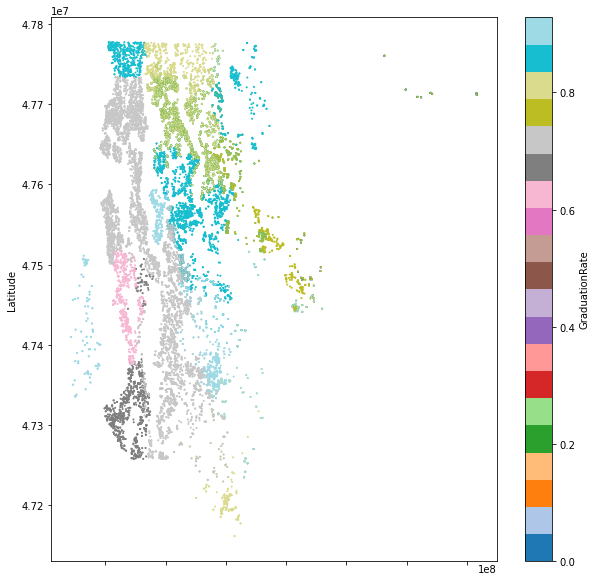

In [92]:
data['isna'] = data['GraduationRate'].isna().astype(int)*2
data.plot.scatter('Longitude','Latitude',c='GraduationRate',colormap='tab20',figsize=(10,10),s=1)

In [87]:
data[data['GraduationRate'].isna()]['district'].unique()

array(['Fife', nan], dtype=object)

In [106]:
census = pd.read_csv(os.getcwd()+'/census.csv')
census

,GISJOIN,BlockGroup,STATEA,COUNTYA,TRACTA,BLKGRPA,ADNEE001,ADNEE002,ADNEE003,ADNEE004,ADNEE005,ADNEE006,ADNEE007,ADNEE008,ADPYE001,ADRKE001,ADRWE001
0,G53000109501001,530019501001,53,1,950100,1,758,10,5,96,0,60,0,587,287,633.0,194000.0
1,G53000109501002,530019501002,53,1,950100,2,956,49,8,45,11,103,3,737,570,733.0,131600.0
2,G53000109501003,530019501003,53,1,950100,3,555,46,94,90,43,86,20,176,297,548.0,68600.0
3,G53000109502001,530019502001,53,1,950200,1,475,42,32,7,62,20,3,309,258,671.0,78700.0
4,G53000109502002,530019502002,53,1,950200,2,665,35,82,27,34,28,35,424,314,840.0,127100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4778,G53007709400043,530779400043,53,77,940004,3,2576,258,621,284,239,378,158,638,677,709.0,102800.0
4779,G53007709400051,530779400051,53,77,940005,1,2491,157,754,134,109,290,165,882,707,639.0,122400.0
4780,G53007709400052,530779400052,53,77,940005,2,2222,374,530,171,188,260,49,650,596,769.0,124700.0
4781,G53007709400061,530779400061,53,77,940006,1,2848,317,801,105,232,526,97,770,682,716.0,103500.0
